In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-data/weather_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/weather-data/weather_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [4]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [5]:
df.dtypes

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object

In [6]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
df.isnull().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [8]:
print("Unique values in date column :" , df['date'].value_counts())
print("Unique values in avg_temperature column :" , df['avg_temperature'].value_counts())
print("Unique values in humidity column :" , df['humidity'].value_counts())
print("Unique values in avg_wind_speed column :" , df['avg_wind_speed'].value_counts())
print("Unique values in rain_or_not column :" , df['rain_or_not'].value_counts())
print("Unique values in cloud_cover column :" , df['cloud_cover'].value_counts())
print("Unique values in pressure column :" , df['pressure'].value_counts())

Unique values in date column : date
2023-01-01    1
2023-07-25    1
2023-08-01    1
2023-07-31    1
2023-07-30    1
             ..
2023-04-14    1
2023-04-13    1
2023-04-12    1
2023-04-11    1
2023-11-07    1
Name: count, Length: 311, dtype: int64
Unique values in avg_temperature column : avg_temperature
35.000000    33
15.000000    22
23.745401     1
19.582169     1
20.780694     1
             ..
27.880305     1
24.870063     1
28.074402     1
29.484273     1
19.389714     1
Name: count, Length: 243, dtype: int64
Unique values in humidity column : humidity
30.000000    58
46.140905     1
35.423177     1
30.743870     1
31.225163     1
             ..
45.871607     1
58.613066     1
55.448731     1
64.433512     1
37.717416     1
Name: count, Length: 239, dtype: int64
Unique values in avg_wind_speed column : avg_wind_speed
7.845981     1
13.108351    1
2.053284     1
0.164937     1
3.096319     1
            ..
9.483964     1
8.708825     1
5.435908     1
13.722689    1
9.388371   

Checking Distribution of Features:
avg_temperature: Skewness = -0.2130 (Normally Distributed)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


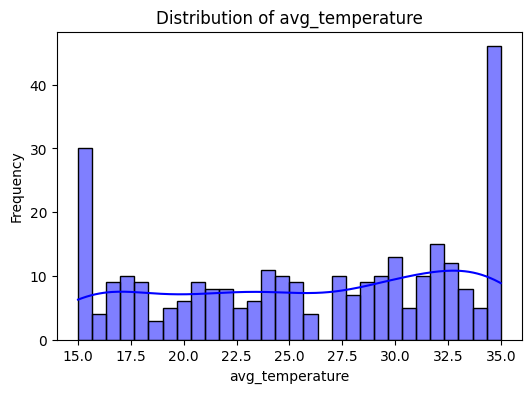

humidity: Skewness = -0.0097 (Normally Distributed)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


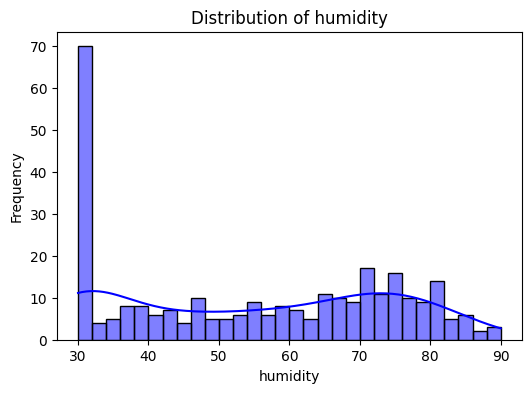

avg_wind_speed: Skewness = 2.8185 (Skewed)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


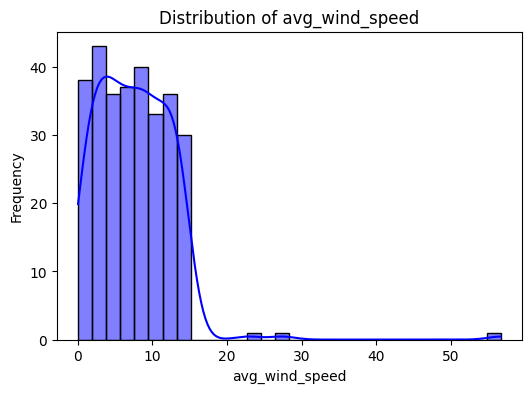

cloud_cover: Skewness = -0.0482 (Normally Distributed)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


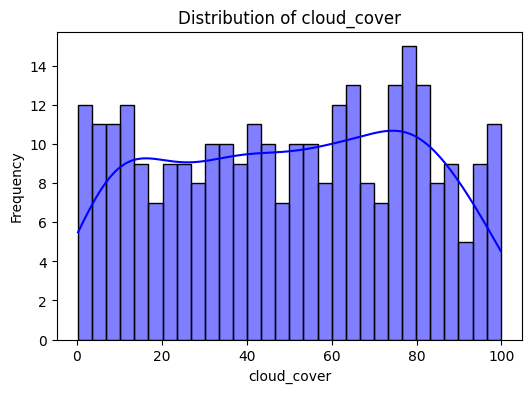

pressure: Skewness = -0.0752 (Normally Distributed)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


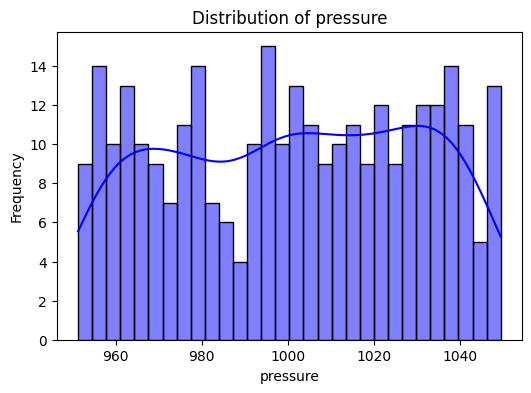

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of each numerical feature
print("Checking Distribution of Features:")
for col in ['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover', 'pressure']:
    skewness = df[col].skew()
    print(f"{col}: Skewness = {skewness:.4f} ({'Normally Distributed' if abs(skewness) < 0.5 else 'Skewed'})")

    # Plot distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
# # Handle missing values (Fill missing numerical values with mean)
# df['avg_temperature'].fillna(df['avg_temperature'].mean(), inplace=True)
# df['humidity'].fillna(df['humidity'].mean(), inplace=True)
# df['avg_wind_speed'].fillna(df['avg_wind_speed'].mean(), inplace=True)
# df['cloud_cover'].fillna(df['cloud_cover'].mean(), inplace=True)

# # Handle missing values by imputing median
# for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']:
#     df[col].fillna(df[col].median(), inplace=True)
    
# from sklearn.impute import SimpleImputer
# # Impute missing values for numerical columns using SimpleImputer
# num_imputer = SimpleImputer(strategy='mean')
# df[['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover','pressure']] = num_imputer.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover','pressure']])


# Handle missing values using mean imputation
for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']:
    df[col].fillna(df[col].mean(), inplace=True)

# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']] = imputer.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']])

<ipython-input-10-49579ea3f271>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
df.isnull().sum()

date               0
avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
dtype: int64

In [12]:
# Drop rows where 'rain_or_not' is missing
df.dropna(subset=['rain_or_not'], inplace=True)

In [13]:
df.duplicated().any()

False

In [14]:
df.head(20)

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
5,2023-01-06,24.148136,49.703435,6.587024,Rain,87.797432,995.818689
6,2023-01-07,23.671006,63.997418,5.654166,Rain,86.805669,998.296887
7,2023-01-08,32.245441,67.083073,6.940197,Rain,80.592540,963.347997
8,2023-01-09,30.078517,64.088581,4.520668,Rain,79.003044,958.060151
9,2023-01-10,31.620631,71.876470,11.214141,Rain,30.467914,1022.793931


In [15]:

# from sklearn.preprocessing import StandardScaler

# # Standardize numerical features
# scaler = StandardScaler()
# df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']] = scaler.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover','pressure']])

In [16]:
df.head(20)

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
5,2023-01-06,24.148136,49.703435,6.587024,Rain,87.797432,995.818689
6,2023-01-07,23.671006,63.997418,5.654166,Rain,86.805669,998.296887
7,2023-01-08,32.245441,67.083073,6.940197,Rain,80.592540,963.347997
8,2023-01-09,30.078517,64.088581,4.520668,Rain,79.003044,958.060151
9,2023-01-10,31.620631,71.876470,11.214141,Rain,30.467914,1022.793931


In [17]:
df.describe()

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,311,311.000000,311.000000,311.000000,311.000000,311.000000
mean,2023-06-05 00:00:00,25.983840,55.041385,7.556636,49.834827,1001.059119
min,2023-01-01 00:00:00,15.000000,30.000000,0.069480,0.321826,951.240404
25%,2023-03-19 12:00:00,20.493383,35.686194,3.711684,25.955498,975.757545
50%,2023-06-05 00:00:00,25.983840,55.041385,7.556636,49.834827,1001.938586
75%,2023-08-21 12:00:00,31.858688,71.978037,10.897166,74.162107,1026.578884
max,2023-11-07 00:00:00,35.000000,90.000000,56.636041,99.834751,1049.543752
std,NaN,6.635859,18.749365,5.213773,28.298916,28.835595


In [18]:
df['rain_or_not'].unique()

array(['Rain', 'No Rain'], dtype=object)

In [19]:
# Encode 'rain_or_not' as 0 (No Rain) and 1 (Rain)
df['rain_or_not'] = df['rain_or_not'].map({'No Rain': 0, 'Rain': 1})

In [20]:
df.head(20)

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331
5,2023-01-06,24.148136,49.703435,6.587024,1,87.797432,995.818689
6,2023-01-07,23.671006,63.997418,5.654166,1,86.805669,998.296887
7,2023-01-08,32.245441,67.083073,6.940197,1,80.592540,963.347997
8,2023-01-09,30.078517,64.088581,4.520668,1,79.003044,958.060151
9,2023-01-10,31.620631,71.876470,11.214141,1,30.467914,1022.793931


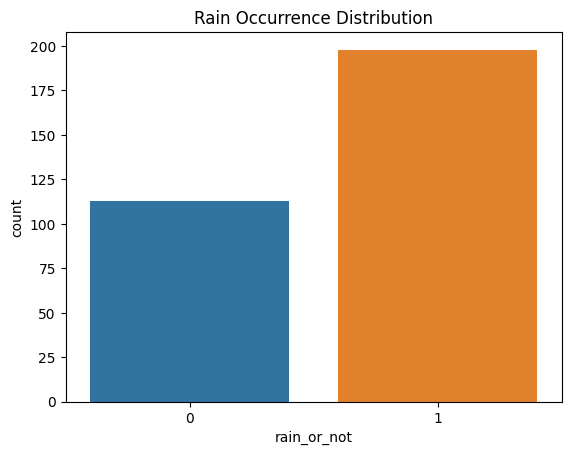

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


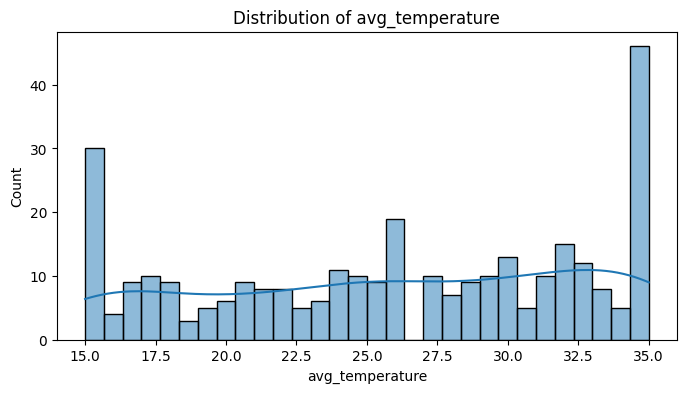

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


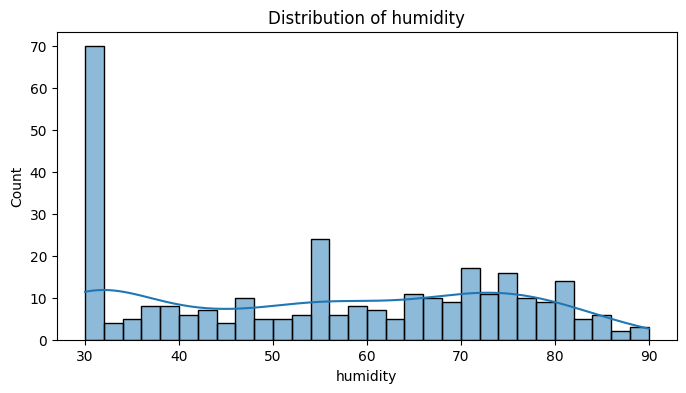

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


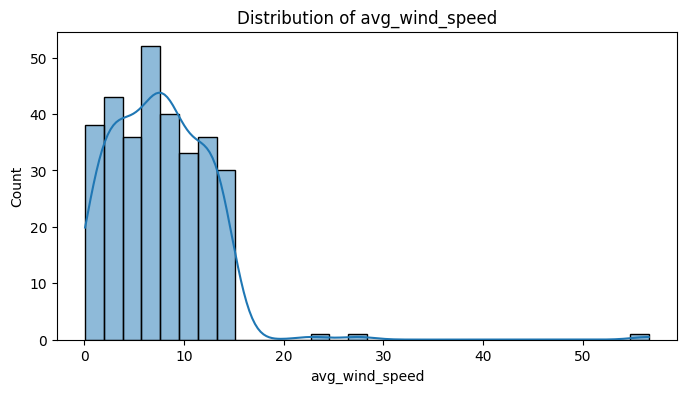

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


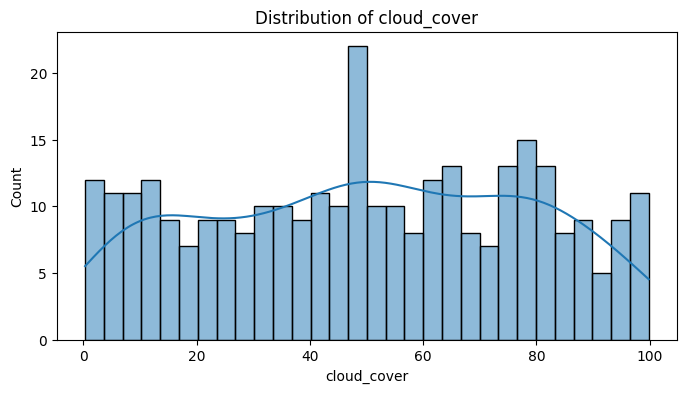

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


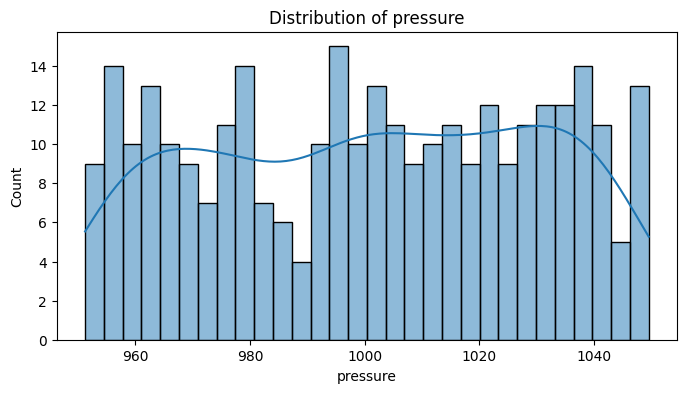

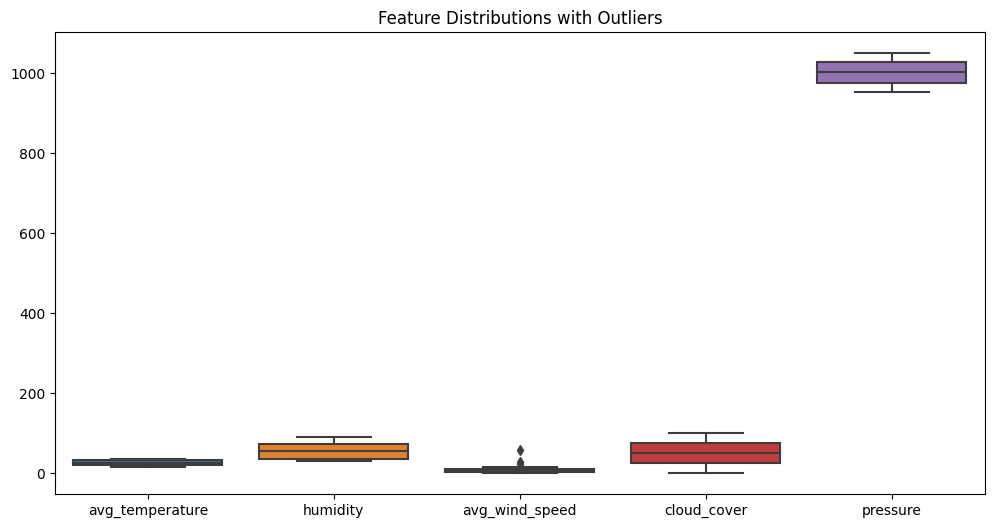

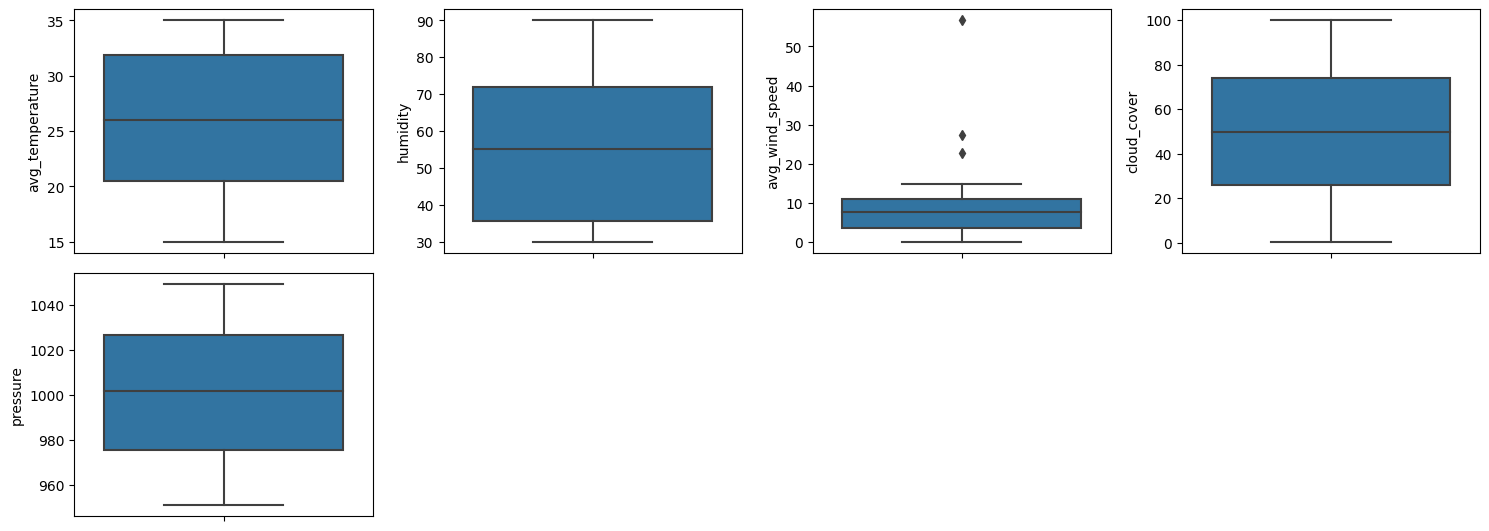

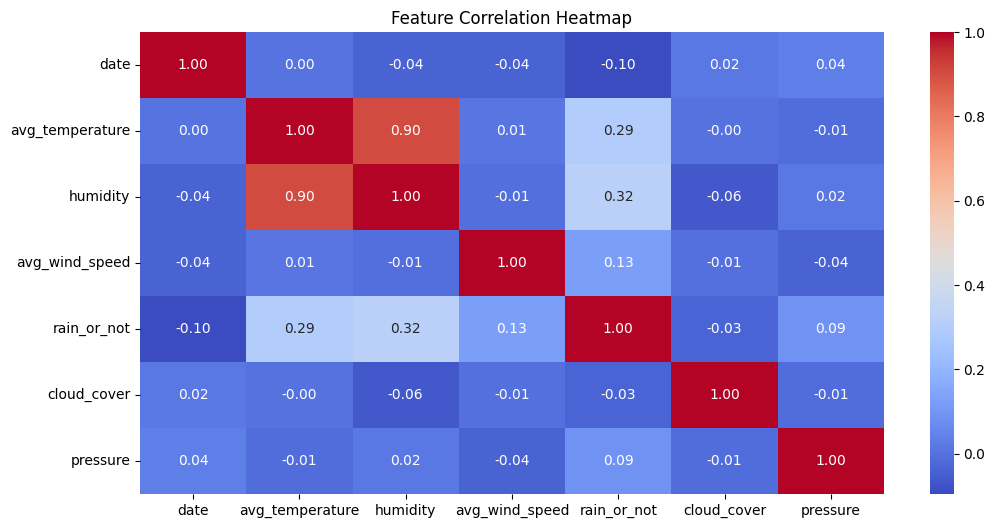

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

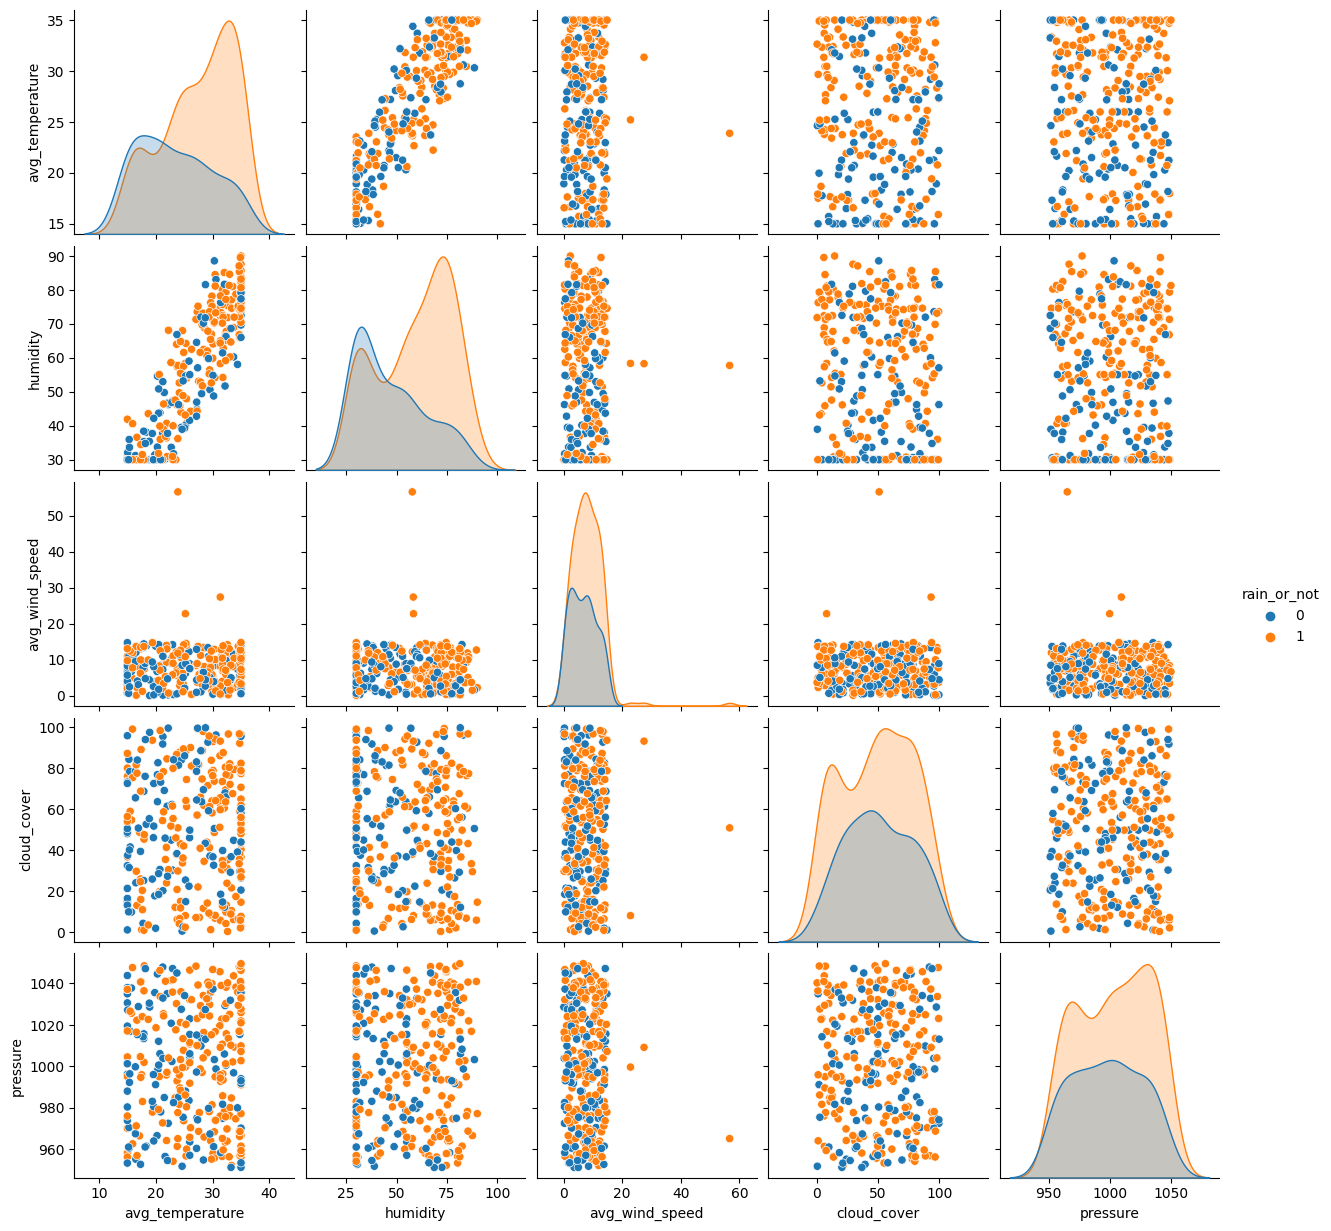

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(x='rain_or_not', data=df)
plt.title('Rain Occurrence Distribution')
plt.show()

# Distribution plots for continuous data
continuous_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']])
plt.title('Feature Distributions with Outliers')
plt.show()

# Improved Boxplots for continuous features
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
plt.figure(figsize=(15, 8))
for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, hue='rain_or_not')
plt.show()


In [22]:
df.groupby('rain_or_not').mean()

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
rain_or_not,,,,,,
0,2023-06-16 09:58:56.283185920,23.397200,47.064727,6.690136,51.110940,997.627100
1,2023-05-29 11:38:10.909090816,27.460053,59.593720,8.051154,49.106541,1003.017796


In [23]:
# Identify highly correlated features
correlation_matrix = df.corr()
high_correlation_threshold = 0.85  # Define threshold for high correlation
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly Correlated Features:", highly_correlated_features)

Highly Correlated Features: {'humidity'}


In [24]:
Q1 = df['avg_wind_speed'].quantile(0.25)
Q3 = df['avg_wind_speed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['avg_wind_speed'] >= lower_bound) & (df['avg_wind_speed'] <= upper_bound)]


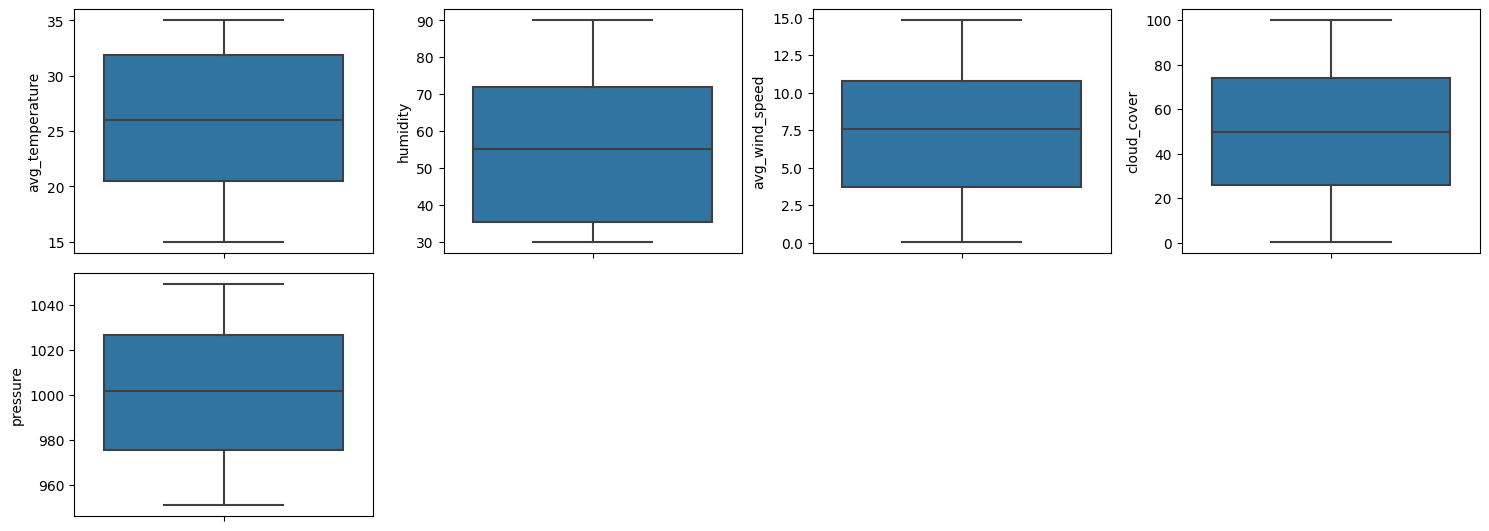

In [25]:
# Improved Boxplots for continuous features
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
plt.figure(figsize=(15, 8))
for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

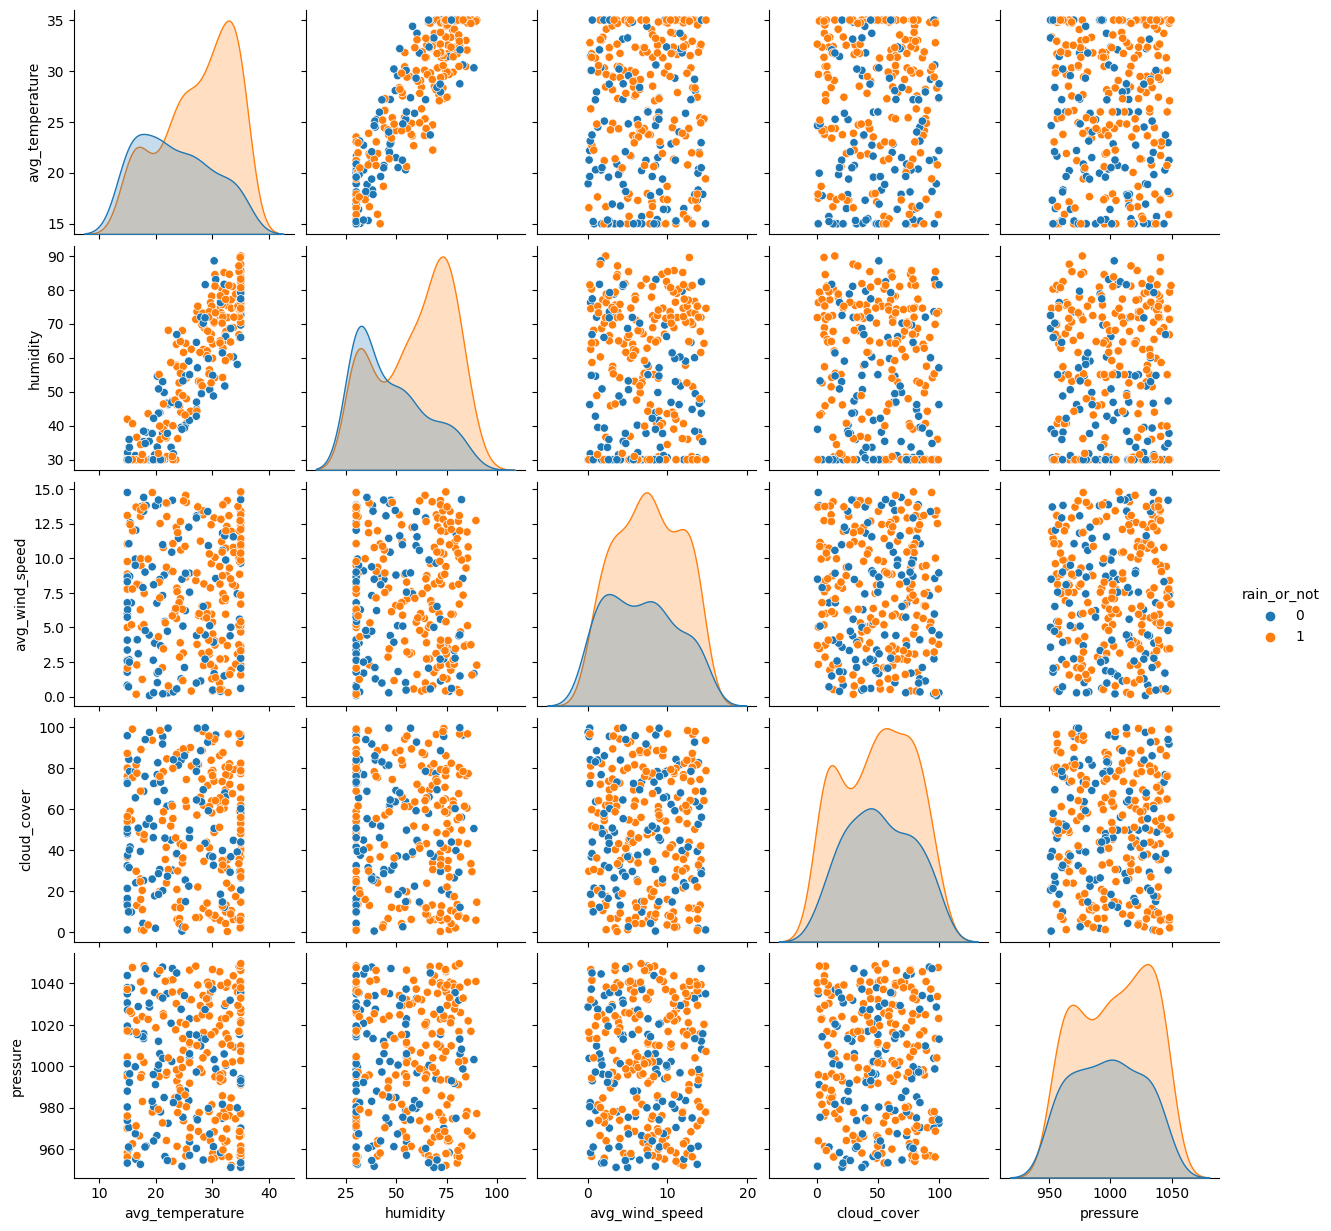

In [26]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='rain_or_not')
plt.show()

In [27]:
# from sklearn.preprocessing import StandardScaler
# # Standardize numerical features
# scaler = StandardScaler()
# df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']] = scaler.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']])

In [28]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331


In [29]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Splitting the data into training and testing sets
# X = df[['avg_temperature', 'humidity','avg_wind_speed', 'cloud_cover', 'pressure']]
# y = df['rain_or_not']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize models
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(n_estimators=100),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
# }

# # Train and evaluate models
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"{name} Accuracy: {acc:.4f}")
#     print(classification_report(y_test, y_pred))


In [30]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_


In [31]:
# # Predict rain probability for test data
# y_prob = best_model.predict_proba(X_test)[:, 1]

# # Display the first few probabilities
# print("Predicted Rain Probabilities:", y_prob[:10])


In [32]:
# from sklearn.metrics import confusion_matrix

# # Get predictions
# y_pred = best_model.predict(X_test)

# # Accuracy Score
# accuracy = accuracy_score(y_test, y_pred)
# print("Final Model Accuracy:", accuracy)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()


In [33]:
# # Install XGBoost if not already installed
# !pip install xgboost

# import xgboost as xgb
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_squared_error


In [34]:
# xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
# xgb_model.fit(X_train, y_train)

# # Predictions & Accuracy
# y_pred_xgb = xgb_model.predict(X_test)
# xgb_acc = accuracy_score(y_test, y_pred_xgb)

# print("XGBoost Accuracy:", xgb_acc)
# print(classification_report(y_test, y_pred_xgb))


In [35]:
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# # Predict probabilities
# y_pred_lr = lin_reg.predict(X_test)

# # Convert to 0 or 1
# y_pred_lr_class = np.round(y_pred_lr).astype(int)

# # Ensure all predictions are within [0,1] bounds
# y_pred_lr_class = np.clip(y_pred_lr_class, 0, 1)

# # Accuracy Score
# lin_reg_acc = accuracy_score(y_test, y_pred_lr_class)

# print("Linear Regression (for classification) Accuracy:", lin_reg_acc)
# print(classification_report(y_test, y_pred_lr_class))


In [36]:
# model_accuracies = {
#     "Logistic Regression": accuracy_score(y_test, models["Logistic Regression"].predict(X_test)),
#     "Decision Tree": accuracy_score(y_test, models["Decision Tree"].predict(X_test)),
#     "Random Forest": accuracy_score(y_test, models["Random Forest"].predict(X_test)),
#     "Gradient Boosting": accuracy_score(y_test, models["Gradient Boosting"].predict(X_test)),
#     "XGBoost": xgb_acc,
#     "Linear Regression (Rounded)": lin_reg_acc
# }

# # Print all accuracies
# for model, acc in model_accuracies.items():
#     print(f"{model}: {acc:.4f}")


In [37]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# # Check correlation to drop less important features
# correlation_matrix = df.corr()
# print("Feature Correlation with Target Variable:")
# print(correlation_matrix['rain_or_not'].sort_values(ascending=False))

# # Drop less important features based on correlation analysis
# drop_features = []
# if abs(correlation_matrix['rain_or_not']['pressure']) < 0.05:
#     drop_features.append('pressure')
# if abs(correlation_matrix['rain_or_not']['cloud_cover']) < 0.05:
#     drop_features.append('cloud_cover')

# df.drop(columns=drop_features, inplace=True)

# # Feature selection
# X = df.drop(columns=['rain_or_not', 'date'])
# y = df['rain_or_not']

# # Split data into training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=500),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(n_estimators=100),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
#     "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
# }

# # Train and evaluate models
# model_accuracies = {}
# for name, model in models.items():
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)
#     model_accuracies[name] = accuracy_score(y_test, y_pred)
#     print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#     print(classification_report(y_test, y_pred))

# # Feature importance using Random Forest
# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train_scaled, y_train)
# feature_importances = rf.feature_importances_
# plt.figure(figsize=(8, 5))
# plt.bar(X.columns, feature_importances, color='skyblue')
# plt.xlabel("Features")
# plt.ylabel("Importance Score")
# plt.title("Feature Importance (Random Forest)")
# plt.xticks(rotation=45)
# plt.show()

# # Hyperparameter tuning for the best model (Random Forest)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }
# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# # Predict rain probability for the next 21 days (assuming last 21 entries as future data)
# X_future = X.iloc[-21:, :]
# X_future_scaled = scaler.transform(X_future)
# y_prob = best_model.predict_proba(X_future_scaled)[:, 1]

# print("Predicted Rain Probabilities for Next 21 Days:", y_prob)



In [38]:
df.head(20)

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331
5,2023-01-06,24.148136,49.703435,6.587024,1,87.797432,995.818689
6,2023-01-07,23.671006,63.997418,5.654166,1,86.805669,998.296887
7,2023-01-08,32.245441,67.083073,6.940197,1,80.592540,963.347997
8,2023-01-09,30.078517,64.088581,4.520668,1,79.003044,958.060151
9,2023-01-10,31.620631,71.876470,11.214141,1,30.467914,1022.793931


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, classification_report



# Drop less important features based on prior analysis
df.drop(columns=['cloud_cover'], inplace=True)

# Feature selection
X = df.drop(columns=['rain_or_not', 'date'])
y = df['rain_or_not']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models with hyperparameter tuning using GridSearchCV
models = {
    "Logistic Regression": GridSearchCV(LogisticRegression(max_iter=500),
                                         param_grid={'C': [0.01, 0.1, 1, 10]},
                                         cv=5, scoring='accuracy'),
    "Decision Tree": GridSearchCV(DecisionTreeClassifier(),
                                   param_grid={'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
                                   cv=5, scoring='accuracy'),
    "Random Forest": GridSearchCV(RandomForestClassifier(),
                                   param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
                                   cv=5, scoring='accuracy'),
    "Gradient Boosting": GridSearchCV(GradientBoostingClassifier(),
                                       param_grid={'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
                                       cv=5, scoring='accuracy'),
    "XGBoost": GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                              param_grid={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
                              cv=5, scoring='accuracy'),
    "SVM": GridSearchCV(SVC(probability=True),
                         param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
                         cv=5, scoring='accuracy'),
    "KNN": GridSearchCV(KNeighborsClassifier(),
                         param_grid={'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
                         cv=5, scoring='accuracy')
}

# Train models and evaluate performance
model_accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else np.zeros_like(y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if np.any(y_prob) else 0.0
    
    model_accuracies[name] = {
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1-score": f1,
        "AUC-ROC": auc
    }
    
    print(f"{name} - Accuracy: {acc:.4f}, Balanced Accuracy: {bal_acc:.4f}, F1-score: {f1:.4f}, AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

# Select the best model based on accuracy
best_model_name = max(model_accuracies, key=lambda x: model_accuracies[x]['Accuracy'])
best_model_accuracy = model_accuracies[best_model_name]['Accuracy']
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

# Select top 3 models based on accuracy for ensemble voting
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1]['Accuracy'], reverse=True)[:3]
best_models = [models[model_name].best_estimator_ for model_name, _ in sorted_models]
ensemble = VotingClassifier(estimators=[(name, model) for name, model in zip([m[0] for m in sorted_models], best_models)], voting='soft')

# Train the ensemble model
ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_prob_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]

# Evaluate ensemble model
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
bal_acc_ensemble = balanced_accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
auc_ensemble = roc_auc_score(y_test, y_prob_ensemble)

print(f"Ensemble Model - Accuracy: {acc_ensemble:.4f}, Balanced Accuracy: {bal_acc_ensemble:.4f}, F1-score: {f1_ensemble:.4f}, AUC-ROC: {auc_ensemble:.4f}")

# Retrain best model on full data and predict next 21 days
best_final_model = models[best_model_name].best_estimator_
best_final_model.fit(scaler.fit_transform(X), y)
X_future = X.iloc[-21:, :]
X_future_scaled = scaler.transform(X_future)
y_future_prob = best_final_model.predict_proba(X_future_scaled)[:, 1]

print("Predicted Rain Probabilities for Next 21 Days:", y_future_prob)

Training Logistic Regression...
Logistic Regression - Accuracy: 0.6290, Balanced Accuracy: 0.5489, F1-score: 0.7416, AUC-ROC: 0.6330
              precision    recall  f1-score   support

           0       0.46      0.27      0.34        22
           1       0.67      0.82      0.74        40

    accuracy                           0.63        62
   macro avg       0.57      0.55      0.54        62
weighted avg       0.60      0.63      0.60        62

Training Decision Tree...
Decision Tree - Accuracy: 0.6290, Balanced Accuracy: 0.5489, F1-score: 0.7416, AUC-ROC: 0.6227
              precision    recall  f1-score   support

           0       0.46      0.27      0.34        22
           1       0.67      0.82      0.74        40

    accuracy                           0.63        62
   macro avg       0.57      0.55      0.54        62
weighted avg       0.60      0.63      0.60        62

Training Random Forest...
Random Forest - Accuracy: 0.5484, Balanced Accuracy: 0.4761, F1-sc

<ipython-input-46-9b0d38b2d0d4>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


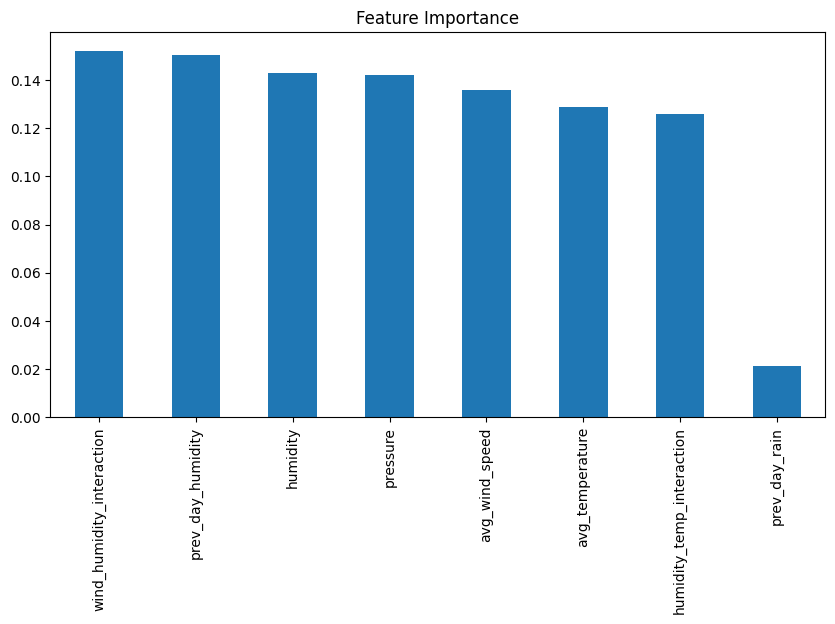

rain_or_not                  1.000000
humidity                     0.323489
humidity_temp_interaction    0.318456
prev_day_humidity            0.317770
avg_temperature              0.296098
wind_humidity_interaction    0.237978
prev_day_rain                0.183811
avg_wind_speed               0.125735
pressure                     0.090839
date                        -0.092384
Name: rain_or_not, dtype: float64
Reduced Model Accuracy: 0.6451612903225806
Training Logistic Regression...
Logistic Regression - Accuracy: 0.6129, Balanced Accuracy: 0.5784, F1-score: 0.7000, AUC-ROC: 0.6627
              precision    recall  f1-score   support

           0       0.53      0.40      0.45        25
           1       0.65      0.76      0.70        37

    accuracy                           0.61        62
   macro avg       0.59      0.58      0.58        62
weighted avg       0.60      0.61      0.60        62

Training Decision Tree...
Decision Tree - Accuracy: 0.6613, Balanced Accuracy: 0.61

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest - Accuracy: 0.6290, Balanced Accuracy: 0.5919, F1-score: 0.7160, AUC-ROC: 0.6573
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        25
           1       0.66      0.78      0.72        37

    accuracy                           0.63        62
   macro avg       0.61      0.59      0.59        62
weighted avg       0.62      0.63      0.61        62

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.6452, Balanced Accuracy: 0.5989, F1-score: 0.7381, AUC-ROC: 0.6659
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        25
           1       0.66      0.84      0.74        37

    accuracy                           0.65        62
   macro avg       0.63      0.60      0.59        62
weighted avg       0.64      0.65      0.62        62

Training XGBoost...
XGBoost - Accuracy: 0.5806, Balanced Accuracy: 0.5514, F1-score: 0.6667, AUC-ROC: 0.6130
             

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, classification_report

# Load dataset
file_path = "/kaggle/input/weather-data/weather_data.csv"
data = pd.read_csv(file_path)

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Encode 'rain_or_not' as binary
data['rain_or_not'] = data['rain_or_not'].apply(lambda x: 1 if str(x).strip().lower() == 'rain' else 0)

# # Handle missing values using KNN imputation
# imputer = KNNImputer(n_neighbors=5)
# data[['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure']] = imputer.fit_transform(data[['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure']])


# Handle missing values using mean imputation
for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']:
    data[col].fillna(data[col].mean(), inplace=True)


# Feature Engineering
# Creating lag features (previous day's rain and humidity)
data['prev_day_rain'] = data['rain_or_not'].shift(1)
data['prev_day_humidity'] = data['humidity'].shift(1)

# Drop NaN rows caused by lag features
data.dropna(inplace=True)

# Creating interaction terms
data['humidity_temp_interaction'] = data['humidity'] * data['avg_temperature']
data['wind_humidity_interaction'] = data['avg_wind_speed'] * data['humidity']

# Drop less important features based on correlation analysis
data.drop(columns=['cloud_cover'], inplace=True)

# Feature selection
X = data.drop(columns=['rain_or_not', 'date'])
y = data['rain_or_not']

# Ensure X and y have the same length
y = y.iloc[:len(X)]

# Check feature importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X, y)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance")
plt.show()

# Check correlation with target variable
corr_matrix = data.corr()
print(corr_matrix["rain_or_not"].sort_values(ascending=False))

# Train models with and without interaction & lag features for comparison
X_reduced = data.drop(columns=['rain_or_not', 'date', 'prev_day_rain', 'prev_day_humidity', 'humidity_temp_interaction', 'wind_humidity_interaction'])
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
rf_model.fit(X_train_reduced, y_train)
y_pred_reduced = rf_model.predict(X_test_reduced)
print("Reduced Model Accuracy:", accuracy_score(y_test, y_pred_reduced))

# Feature scaling (Using RobustScaler to handle outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Define models with hyperparameter tuning using RandomizedSearchCV for faster tuning
models = {
    "Logistic Regression": RandomizedSearchCV(LogisticRegression(max_iter=500),
                                               param_distributions={'C': [0.01, 0.1, 1, 10]},
                                               cv=5, scoring='accuracy', n_iter=5, random_state=42),
    "Decision Tree": RandomizedSearchCV(DecisionTreeClassifier(),
                                         param_distributions={'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
                                         cv=5, scoring='accuracy', n_iter=5, random_state=42),
    "Random Forest": RandomizedSearchCV(RandomForestClassifier(),
                                         param_distributions={'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]},
                                         cv=5, scoring='accuracy', n_iter=5, random_state=42),
    "Gradient Boosting": RandomizedSearchCV(GradientBoostingClassifier(),
                                             param_distributions={'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2]},
                                             cv=5, scoring='accuracy', n_iter=5, random_state=42),
    "XGBoost": RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                    param_distributions={'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]},
                                    cv=5, scoring='accuracy', n_iter=5, random_state=42),
    "SVM": RandomizedSearchCV(SVC(probability=True),
                               param_distributions={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
                               cv=5, scoring='accuracy', n_iter=5, random_state=42),
    "KNN": RandomizedSearchCV(KNeighborsClassifier(),
                               param_distributions={'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
                               cv=5, scoring='accuracy', n_iter=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train models and evaluate performance
model_accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    best_model = model.best_estimator_ if hasattr(model, 'best_estimator_') else model
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else np.zeros_like(y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if np.any(y_prob) else 0.0
    
    model_accuracies[name] = {
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1-score": f1,
        "AUC-ROC": auc
    }
    
    print(f"{name} - Accuracy: {acc:.4f}, Balanced Accuracy: {bal_acc:.4f}, F1-score: {f1:.4f}, AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))
